In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders_df = pd.read_excel('data/Muesli Project raw data - group 3.xlsx', header=1, sheet_name=0)
campaign_data_df = pd.read_excel('data/Muesli Project raw data - group 3.xlsx', sheet_name=1)
order_process_data_df = pd.read_excel('data/Muesli Project raw data - group 3.xlsx', sheet_name=2)
interndata_study_df = pd.read_excel('data/Muesli Project raw data - group 3.xlsx', sheet_name=3)

In [3]:
print('-----Orders-----')
print(orders_df.shape)
display(orders_df.sample(5))

print('-----Campaign Data-----')
print(campaign_data_df.shape)
display(campaign_data_df.sample(5))

print('-----Order Process Data-----')
print(order_process_data_df.shape)
display(order_process_data_df.sample(5))

print('-----InternData Study-----')
print(interndata_study_df.shape)
display(interndata_study_df.sample(5))

-----Orders-----
(9994, 19)


,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
4972,2978,CA-2020-134607,2020-10-03,Second Class,HL-15040,Hunter Lopez,Email,United States,Rochester,New York,14609.0,East,Power Muesli,Steel Cut,OFF-ST-10002214,22.580,2,0.0,5.8708
480,6275,US-2019-139087,2019-07-17,Second Class,DK-13375,Dennis Kane,Email,United States,Seattle,Washington,98105.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004595,428.400,3,0.0,89.9640
7766,8667,CA-2019-163951,2019-12-30,First Class,CJ-11875,Carl Jackson,Sales,United States,Philadelphia,Pennsylvania,19140.0,East,Power Muesli,Super Mega Protein,OFF-AR-10004269,16.520,5,0.2,1.6520
3100,7069,CA-2019-114209,2019-05-21,Standard Class,AS-10285,Alejandro Savely,Sales,United States,Dallas,Texas,75081.0,Central,Power Muesli,Nuts and more,OFF-PA-10003591,82.656,9,0.2,30.9960
6303,4846,CA-2018-124044,2018-07-23,Second Class,MS-17830,Melanie Seite,Email,United States,Rochester,New York,14609.0,East,Power Muesli,Super Fibre Boost,OFF-BI-10003460,10.512,3,0.2,3.6792


-----Campaign Data-----
(333, 3)


,Order ID,Arrival Scan Date,Customer Name
9,CA-2019-109869,2019-05-07,Tanja Norvell
315,CA-2020-113474,2020-04-07,Tony Molinari
216,CA-2019-109820,2019-11-25,Allen Goldenen
43,CA-2019-161543,2019-05-22,Roger Demir
139,CA-2019-116232,2019-10-04,Amy Cox


-----Order Process Data-----
(5899, 5)


,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
2557,8724,US-2019-135209,2019-12-29,2020-01-03,Standard Processing
4816,8241,CA-2020-103065,2020-10-20,2020-10-21,Express
493,4987,CA-2019-149279,2019-04-24,2019-05-01,Standard Processing
2578,8763,CA-2019-112578,2019-12-29,2020-01-06,Standard Processing
4186,3751,CA-2020-161956,2020-08-27,2020-09-02,Standard Processing


-----InternData Study-----
(290, 3)


,Order ID,Ready to Ship Date,Pickup Date
128,CA-2020-167941,2020-11-09,2020-11-12
32,CA-2019-131205,2019-09-09,2019-09-11
63,CA-2019-150007,2019-09-16,2019-09-18
200,CA-2020-122490,2020-11-18,2020-11-20
40,CA-2019-117604,2019-09-09,2019-09-11


In [4]:
%store -r df
%store -r df1
%store -r df2
%store -r df2_no_dups
%store -r df3
%store -r df3_no_dups
%store -r df_dur_readytoship_truck
%store -r df_dur_readytoship_truck_standard
%store -r df_dur_readytoship_truck_xpress
%store -r df_no_dups
%store -r df_order_del_time
%store -r df_order_del_time2
%store -r df_order_del_total
%store -r df_prep_dur_ver

In [5]:
df.sample(5)

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
8831,CA-2017-166954,2017-04-25,Standard Class,BT-11305,Beth Thompson,United States,San Gabriel,California,91776.0,West,FUR-FU-10003708,303.250,5,0.0,63.6825
2996,CA-2017-100762,2017-11-24,Standard Class,NG-18355,Nat Gilpin,United States,Jackson,Michigan,49201.0,Central,OFF-PA-10001815,144.120,3,0.0,69.1776
6649,CA-2019-110492,2019-02-12,First Class,JS-15880,John Stevenson,United States,Atlanta,Georgia,30318.0,South,OFF-BI-10003274,15.920,4,0.0,7.4824
1734,CA-2020-152926,2020-10-02,Second Class,SC-20695,Steve Chapman,United States,Houston,Texas,77041.0,Central,OFF-AP-10004708,15.224,2,0.8,-38.8212
3736,CA-2017-131002,2017-09-07,Second Class,TB-21400,Tom Boeckenhauer,United States,Tulsa,Oklahoma,74133.0,Central,TEC-PH-10000215,104.850,3,0.0,28.3095


In [6]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')

df1.columns = map(str.lower, df1.columns)
df1.columns = df1.columns.str.replace(' ', '_')

df2.columns = map(str.lower, df2.columns)
df2.columns = df2_no_dups.columns.str.replace(' ', '_')

df2_no_dups.columns = map(str.lower, df2.columns)
df2_no_dups.columns = df2_no_dups.columns.str.replace(' ', '_')

df3.columns = map(str.lower, df3.columns)
df3.columns = df3_no_dups.columns.str.replace(' ', '_')

df3_no_dups.columns = map(str.lower, df3_no_dups.columns)
df3_no_dups.columns = df3_no_dups.columns.str.replace(' ', '_')

df_dur_readytoship_truck.columns = map(str.lower, df_dur_readytoship_truck.columns)
df_dur_readytoship_truck.columns = df_dur_readytoship_truck.columns.str.replace(' ', '_')

df_dur_readytoship_truck_standard.columns = map(str.lower, df_dur_readytoship_truck_standard.columns)
df_dur_readytoship_truck_standard.columns = df_dur_readytoship_truck_standard.columns.str.replace(' ', '_')

df_dur_readytoship_truck_xpress.columns = map(str.lower, df_dur_readytoship_truck_xpress.columns)
df_dur_readytoship_truck_xpress.columns = df_dur_readytoship_truck_xpress.columns.str.replace(' ', '_')

df_no_dups.columns = map(str.lower, df_no_dups.columns)
df_no_dups.columns = df_no_dups.columns.str.replace(' ', '_')

df_order_del_time.columns = map(str.lower, df_order_del_time.columns)
df_order_del_time.columns = df_order_del_time.columns.str.replace(' ', '_')

df_order_del_time2.columns = map(str.lower, df_order_del_time2.columns)
df_order_del_time2.columns = df_order_del_time2.columns.str.replace(' ', '_')

df_order_del_total.columns = map(str.lower, df_order_del_total.columns)
df_order_del_total.columns = df_order_del_total.columns.str.replace(' ', '_')

df_prep_dur_ver.columns = map(str.lower, df_prep_dur_ver.columns)
df_prep_dur_ver.columns = df_prep_dur_ver.columns.str.replace(' ', '_')

In [7]:
print('df_no_dups')
display(df_no_dups.sample(5))

print('df1')
display(df1.sample(5))

print('df2_no_dups')
display(df2_no_dups.sample(5))

print('df3_no_dups')
display(df3_no_dups.sample(5))

print('Preparation duration verification')
display(df_prep_dur_ver.sample(5))

print('Standard loading time')
display(df_dur_readytoship_truck_standard.sample(5))

print('Express loading time')
display(df_dur_readytoship_truck_xpress.sample(5))

print('delivery time')
display(df_order_del_time.sample(5))

print('delivery time 2')
display(df_order_del_time2.sample(5))

print('total delivery time')
display(df_order_del_total.sample(5))

df_no_dups


,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
1724,CA-2020-156776,2020-08-07,Standard Class,JL-15505,Jeremy Lonsdale,United States,Westminster,California,92683.0,West,OFF-AP-10002534,1473.100,5,0.0,412.4680
9452,CA-2019-141397,2019-06-20,First Class,RC-19825,Roy Collins,United States,Pasadena,California,91104.0,West,FUR-CH-10003846,161.568,2,0.2,-8.0784
6200,CA-2020-134565,2020-06-11,Second Class,TB-21400,Tom Boeckenhauer,United States,Seattle,Washington,98103.0,West,OFF-BI-10001759,18.288,6,0.2,6.6294
1445,CA-2017-140662,2017-11-17,First Class,TS-21205,Thomas Seio,United States,San Francisco,California,94109.0,West,OFF-AP-10001242,241.440,3,0.0,72.4320
6755,CA-2020-134194,2020-12-25,Standard Class,GA-14725,Guy Armstrong,United States,Dallas,Texas,75081.0,Central,OFF-BI-10003684,39.582,9,0.8,-59.3730


df1


,order_id,arrival_scan_date
177,CA-2019-106341,2019-10-30
146,CA-2019-143406,2019-10-07
65,CA-2019-125920,2019-06-03
4,CA-2019-162138,2019-05-06
29,CA-2019-118052,2019-05-15


df2_no_dups


,order_id,on_truck_scan_date,ship_mode
5739,CA-2020-120376,2020-12-24,Express
2844,CA-2020-121706,2020-03-04,Standard Processing
4817,CA-2020-145884,2020-10-21,Express
902,CA-2019-102813,2019-07-03,Express
698,CA-2019-134803,2019-06-05,Standard Processing


df3_no_dups


,order_id,ready_to_ship_date,pickup_date
70,CA-2019-130225,2019-09-17,2019-09-18
116,CA-2020-167227,2020-11-05,2020-11-06
160,US-2020-116659,2020-11-12,2020-11-13
98,CA-2019-108875,2019-10-01,2019-10-02
162,CA-2020-159667,2020-11-13,2020-11-16


Preparation duration verification


,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday,prep_duration,weekday
199,CA-2020-121615,2020-11-03,DL-12925,Daniel Lacy,2020-11-09,2020-11-12,Tuesday,6 days,Tuesday
299,CA-2020-138163,2020-11-17,XP-21865,Xylona Preis,2020-11-20,2020-11-20,Tuesday,3 days,Tuesday
278,CA-2019-165918,2019-09-10,BD-11770,Bryan Davis,2019-09-16,2019-09-18,Tuesday,6 days,Tuesday
168,CA-2020-157420,2020-11-21,HZ-14950,Henia Zydlo,2020-11-23,2020-11-23,Saturday,2 days,Saturday
18,US-2020-153948,2020-11-06,FM-14290,Frank Merwin,2020-11-06,2020-11-06,Friday,0 days,Friday


Standard loading time


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck
175,CA-2020-107874,2020-11-30,Standard Processing,2020-11-27,2020-11-30,3 days
102,CA-2020-152912,2020-11-13,Standard Processing,2020-11-12,2020-11-13,1 days
27,CA-2019-123932,2019-09-13,Standard Processing,2019-09-12,2019-09-13,1 days
199,CA-2020-159506,2020-12-04,Standard Processing,2020-12-02,2020-12-04,2 days
171,CA-2020-149160,2020-11-27,Standard Processing,2020-11-26,2020-11-27,1 days


Express loading time


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,1 days
97,CA-2020-150959,2020-11-13,Express,2020-11-13,2020-11-13,0 days
133,CA-2020-138163,2020-11-20,Express,2020-11-20,2020-11-20,0 days
108,US-2020-157896,2020-11-16,Express,2020-11-16,2020-11-16,0 days
80,US-2020-155425,2020-11-12,Express,2020-11-11,2020-11-12,1 days


delivery time


,order_id,on_truck_scan_date,ship_mode,arrival_scan_date,delivery_time
44,CA-2019-158435,2019-05-20,Express,2019-05-27,7 days
161,CA-2019-131296,2019-10-11,Standard Processing,2019-10-17,6 days
264,CA-2019-112697,2019-12-23,Standard Processing,2019-12-27,4 days
116,CA-2019-145625,2019-09-18,Standard Processing,2019-09-23,5 days
50,CA-2019-130638,2019-05-22,Standard Processing,2019-05-27,5 days


delivery time 2


,order_id,arrival_scan_date,ready_to_ship_date,pickup_date,delivery_time2
13,CA-2019-145625,2019-09-23,2019-09-17,2019-09-18,5 days
12,CA-2019-146206,2019-09-23,2019-09-16,2019-09-18,5 days
0,CA-2019-129630,2019-09-09,2019-09-04,2019-09-04,5 days
5,CA-2019-149783,2019-09-16,2019-09-09,2019-09-11,5 days
8,CA-2019-133123,2019-09-16,2019-09-11,2019-09-13,3 days


total delivery time


,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time
214,US-2019-152373,2019-09-17,2019-09-05,PT-19090,Pete Takahito,12 days
300,US-2019-140158,2019-10-11,2019-10-04,DR-12940,Daniel Raglin,7 days
610,CA-2020-155824,2020-03-23,2020-03-10,KS-16300,Karen Seio,13 days
313,CA-2019-118689,2019-10-14,2019-10-02,TC-20980,Tamara Chand,12 days
152,CA-2019-148852,2019-06-10,2019-05-26,SV-20785,Stewart Visinsky,15 days


In [8]:
df_prep_dur_ver['weekday'] = df_prep_dur_ver['order_date'].dt.day_name()

df_prep_dur_ver

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday,prep_duration,weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday,7 days,Monday
1,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday,6 days,Wednesday
2,CA-2020-135307,2020-11-26,LS-17245,Lynn Smith,2020-11-27,2020-11-27,Thursday,1 days,Thursday
3,CA-2019-102981,2019-09-06,MO-17500,Mary O'Rourke,2019-09-09,2019-09-11,Friday,3 days,Friday
4,US-2020-155425,2020-11-10,AB-10600,Ann Blume,2020-11-11,2020-11-12,Tuesday,1 days,Tuesday
...,...,...,...,...,...,...,...,...,...
413,CA-2020-150266,2020-11-25,RO-19780,Rose O'Brian,2020-11-30,2020-12-02,Wednesday,5 days,Wednesday
414,CA-2019-106278,2019-09-02,BM-11140,Becky Martin,2019-09-05,2019-09-06,Monday,3 days,Monday
415,US-2020-165456,2020-11-30,TB-21625,Trudy Brown,2020-12-03,2020-12-04,Monday,3 days,Monday
416,US-2020-109610,2020-11-25,BS-11590,Brendan Sweed,2020-11-30,2020-12-02,Wednesday,5 days,Wednesday


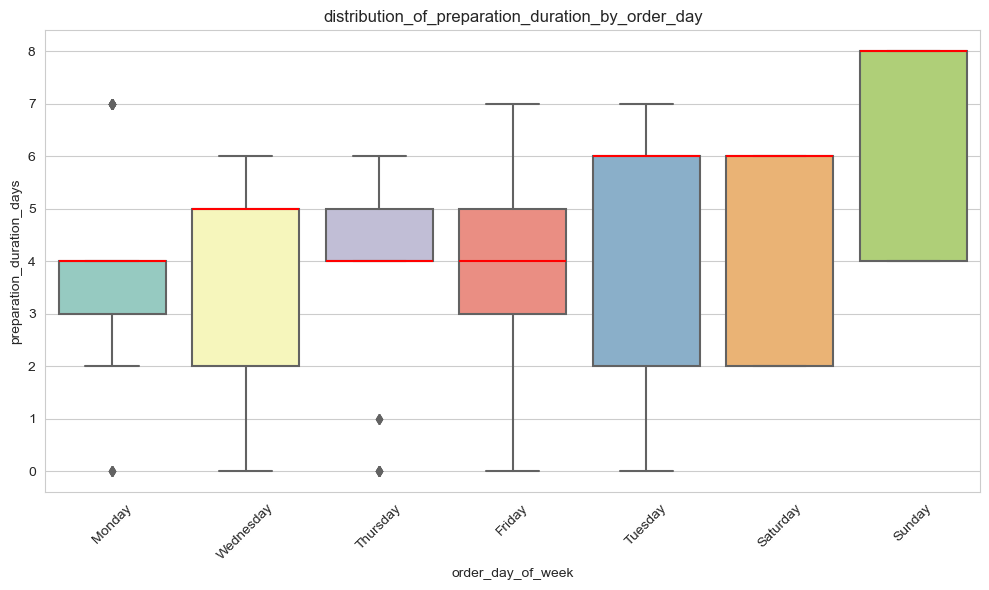

In [9]:
# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, palette='Set3',
            medianprops=dict(color='red'))
plt.title('distribution_of_preparation_duration_by_order_day')
plt.xlabel('order_day_of_week')
plt.ylabel('preparation_duration_days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df_prep_dur_var_Q1 = df_prep_dur_ver['prep_duration'].quantile(0.25)
df_prep_dur_var_Q3 = df_prep_dur_ver['prep_duration'].quantile(0.75)
IQR = df_prep_dur_var_Q3 - df_prep_dur_var_Q1

# Ausreißer sind Werte, die unter (Q1-1.5*IQR) oder über (Q3+1.5*IQR) liegen.
outliers = df_prep_dur_ver[(df_prep_dur_ver['prep_duration'] < (df_prep_dur_var_Q1 - 1.5 * IQR)) | (df_prep_dur_ver['prep_duration'] > (df_prep_dur_var_Q3 + 1.5 * IQR))]

In [12]:
outliers.groupby('weekday')

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,weekday,prep_duration,weekday
